## Bengali Female & Male names classification

#### lets import the required libs

In [130]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [131]:
print(tf.__version__)

2.2.0-rc3


In [132]:
data_path = '../dataset/Bengali-female-vs-male-names.csv'

In [133]:
import csv

names = []
labels = []
total = 0

#### read the data and separate the names and labels

In [134]:
with open(data_path, 'r') as fp:
    data = csv.reader(fp, delimiter=',')
    next(data)
    
    for row in data:
        names.append(row[0])
        labels.append([int(row[1])])
        total += 1

In [135]:
print(f"Total data found: {total}")

Total data found: 2030


In [136]:
sequences = []

char_to_idx = {}
idx_to_char = {}

In [137]:
idx = 1

#### creating char to idx mapping and converting string to sequences

In [138]:
for name in names:
    seq = []
    for ch in name:
        if ch not in char_to_idx:
            char_to_idx[ch] = idx
            idx_to_char[idx] = ch
            seq.append(idx)
            idx += 1
        else:
            seq.append(char_to_idx[ch])
    sequences.append(seq)

In [139]:
len(sequences)

2030

In [140]:
sequences[0]

[1, 2, 3, 4, 5, 6, 7, 1, 8, 9, 10]

In [141]:
sequences[:10]

[[1, 2, 3, 4, 5, 6, 7, 1, 8, 9, 10],
 [11, 12, 13, 11, 14, 8],
 [15, 8, 10, 16, 17],
 [4, 8, 14, 8, 14],
 [18, 19, 2, 8, 20],
 [18, 1, 17, 8, 5, 1, 8, 6, 8, 10, 8],
 [1, 8, 15, 20, 21, 19, 8],
 [18, 22, 21, 23, 8, 5, 18, 24, 21, 24, 8],
 [1, 8, 6, 8],
 [18, 20, 21, 24, 5, 4, 8, 17, 8, 14]]

In [142]:
max_length = max([len(seq) for seq in sequences])
padding_type = 'pre'
trunc_type = 'pre'

In [143]:
max_length

29

In [144]:
padded_sequences = pad_sequences(sequences, padding=padding_type, truncating=trunc_type)

In [145]:
padded_sequences[:10]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  2,  3,  4,  5,  6,  7,  1,  8,  9, 10],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, 11, 12, 13, 11, 14,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, 15,  8, 10, 16, 17],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  4,  8, 14,  8, 14],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, 18, 19,  2,  8, 20],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 18,  1, 17,  8,  5,  1,  8,  6,  8, 10,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  8, 15, 20, 21, 19,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

In [146]:
train_split = 1500

In [147]:
x_train = np.array(padded_sequences[:train_split])
y_train = np.array(labels[:train_split])
x_valid = np.array(padded_sequences[train_split:])
y_valid = np.array(labels[train_split:])

In [148]:
vocab_size = len(char_to_idx) + 1 # plus 1 for out of vocabulary char
embedding_dim = 64

#### lets define a very simple NN for classifying the names

In [149]:
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(6, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

In [150]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 29, 64)            4032      
_________________________________________________________________
flatten_5 (Flatten)          (None, 1856)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 11142     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 15,181
Trainable params: 15,181
Non-trainable params: 0
_________________________________________________________________


In [151]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [152]:
hist = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid), batch_size = 2, verbose=1)

Epoch 1/20
750/750 [==============================] - 1s 1ms/step - loss: 0.4123 - accuracy: 0.8200 - val_loss: 0.2838 - val_accuracy: 0.8774
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2509 - accuracy: 0.8927 - val_loss: 0.2427 - val_accuracy: 0.9075
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2129 - accuracy: 0.9153 - val_loss: 0.2540 - val_accuracy: 0.8925
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.1874 - accuracy: 0.9253 - val_loss: 0.2377 - val_accuracy: 0.9000
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.1635 - accuracy: 0.9340 - val_loss: 0.2420 - val_accuracy: 0.9000
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.1471 - accuracy: 0.9467 - val_loss: 0.2431 - val_accuracy: 0.9075
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.1338 - accuracy: 0.9500 - val_loss: 0.2503 - val_accuracy: 0.9075
Epoch 

In [153]:
model.evaluate(x_valid, y_valid)

17/17 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.9075


[0.41248440742492676, 0.9075471758842468]

In [154]:
def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel(string + ' vs val ' + string)
    plt.show()

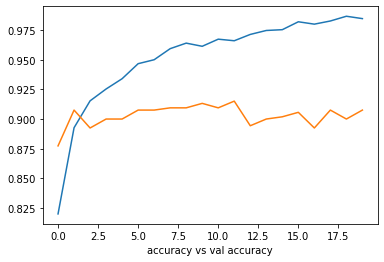

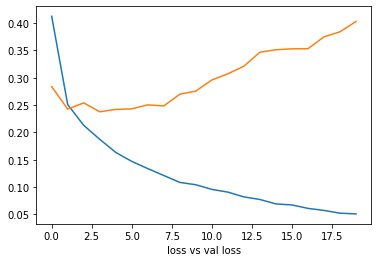

In [155]:
plot_graph(hist, 'accuracy')
plot_graph(hist, 'loss')

### TODO
1. Use different type of networks to improve the performance
2. Do some feature engineering to create new features/names
3. Tune the hyperparameters to check if improvement is possible